In [183]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [122]:
df = pd.read_excel('SSDSE-E-2023.xlsx', skiprows = 2)
df.head()

,地域コード,都道府県,総人口,日本人人口,15歳未満人口,15～64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
0,R00000,全国,125502000,122780000,14784000,74504000,36214000,2402460,840835,1.36,...,67874,339623,107443,321982,29474,2624335,279024,75761,18329,24545
1,R01000,北海道,5183000,5147000,544000,2953000,1686000,34321,29523,1.24,...,2840,13731,4418,11802,1045,79404,268396,71448,22013,23762
2,R02000,青森県,1221000,1216000,127000,676000,419000,5409,6837,1.38,...,511,2773,735,2345,475,30723,245117,69503,13232,19092
3,R03000,岩手県,1196000,1189000,129000,659000,409000,6937,6718,1.35,...,566,2700,1016,2536,390,28895,272911,73738,17181,22302
4,R04000,宮城県,2290000,2269000,264000,1371000,655000,19453,14480,1.23,...,1052,5950,1896,5502,492,39497,284171,75689,19852,24985


In [92]:
#2
pref_list = list(df['都道府県'])

In [93]:
#3
pref_list.remove('全国')

In [94]:
#4
'佐賀県' in pref_list

True

In [101]:
#5
print(pref_list.index('三重県'))
print(pref_list.index('和歌山県'))


23
29


In [114]:
#6
kinki_list = pref_list[23:30]
kinki_list

['三重県', '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県']

In [124]:
#7
kinki_df = pd.DataFrame()
for i in kinki_list:
    kinki_df = pd.concat([kinki_df, df[df['都道府県'] == i]])
kinki_df

,地域コード,都道府県,総人口,日本人人口,15歳未満人口,15～64歳人口,65歳以上人口,外国人人口,出生数,合計特殊出生率,...,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数,消費支出（二人以上の世帯）,食料費（二人以上の世帯）,住居費（二人以上の世帯）,教養娯楽費（二人以上の世帯）
24,R24000,三重県,1756000,1705000,209000,1016000,531000,44721,11141,1.47,...,816,4298,1180,3550,429,39969,295770,73270,15439,26500
25,R25000,滋賀県,1411000,1377000,189000,845000,376000,28704,10437,1.47,...,559,3496,838,3352,330,34237,296980,81058,13564,26266
26,R26000,京都府,2561000,2505000,289000,1515000,758000,52442,16440,1.25,...,1289,9156,1973,6828,508,54203,283208,80899,17141,25858
27,R27000,大阪府,8806000,8565000,1018000,5346000,2442000,208681,61878,1.31,...,5438,26431,8184,27297,1570,163745,249980,78611,23296,20496
28,R28000,兵庫県,5432000,5324000,655000,3169000,1608000,87280,36953,1.41,...,2970,15133,4141,15663,1064,103747,287016,77694,25088,29159
29,R29000,奈良県,1315000,1302000,152000,741000,423000,11505,7831,1.31,...,679,3810,957,3287,220,26285,290843,78070,18176,26055
30,R30000,和歌山県,914000,907000,104000,502000,308000,6029,5732,1.46,...,526,2941,727,2400,197,19765,225703,64931,10909,18545


In [126]:
#8
kinki_df.set_index('都道府県', inplace=True)

In [180]:
#9
kinki_area = kinki_df[['総面積（北方地域及び竹島を除く）','可住地面積', '自然公園面積','耕地面積']]
kinki_area

,総面積（北方地域及び竹島を除く）,可住地面積,自然公園面積,耕地面積
都道府県,,,,
三重県,577447,206413,208394,57600
滋賀県,401738,129957,149957,50900
京都府,461220,117729,94896,29700
大阪府,190534,133407,20039,12400
兵庫県,840094,276946,166081,72800
奈良県,369094,85389,63328,19800
和歌山県,472468,112338,59699,31600


In [196]:
#10
kinki_area['自然公園面積率'] = kinki_area['自然公園面積'] / kinki_area['総面積（北方地域及び竹島を除く）']
kinki_area

,総面積（北方地域及び竹島を除く）,可住地面積,自然公園面積,耕地面積,自然公園面積率
都道府県,,,,,
兵庫県,840094,276946,166081,72800,0.197693
三重県,577447,206413,208394,57600,0.360889
和歌山県,472468,112338,59699,31600,0.126356
京都府,461220,117729,94896,29700,0.205750
滋賀県,401738,129957,149957,50900,0.373271
奈良県,369094,85389,63328,19800,0.171577
大阪府,190534,133407,20039,12400,0.105173


In [203]:
#11
kinki_area = kinki_area.sort_values('自然公園面積率', ascending = False)
kinki_area

,総面積（北方地域及び竹島を除く）,可住地面積,自然公園面積,耕地面積,自然公園面積率
都道府県,,,,,
滋賀県,401738,129957,149957,50900,0.373271
三重県,577447,206413,208394,57600,0.360889
京都府,461220,117729,94896,29700,0.205750
兵庫県,840094,276946,166081,72800,0.197693
奈良県,369094,85389,63328,19800,0.171577
和歌山県,472468,112338,59699,31600,0.126356
大阪府,190534,133407,20039,12400,0.105173


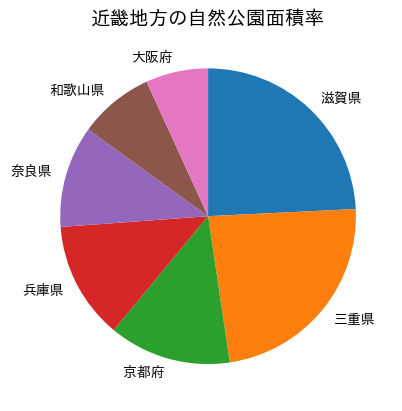

In [198]:
#12
plt.pie(kinki_area['自然公園面積率'], counterclock=False,startangle=90, labels=kinki_area.index)
plt.title('近畿地方の自然公園面積率', fontsize = 14)
plt.show()

In [206]:
#13
kinki_area = kinki_area.sort_values('可住地面積', ascending = False)

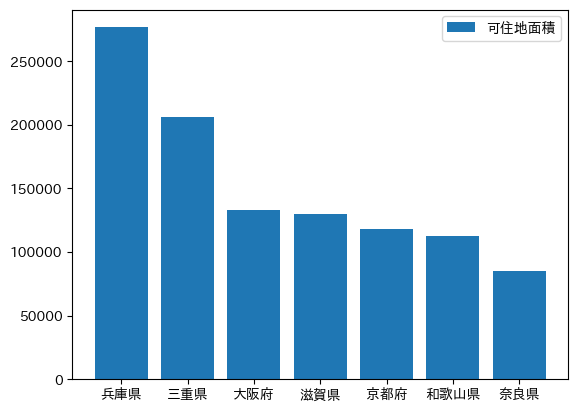

In [208]:
#14
plt.bar(x=kinki_area.index, height = kinki_area['可住地面積'], label='可住地面積')
plt.legend()
plt.show()

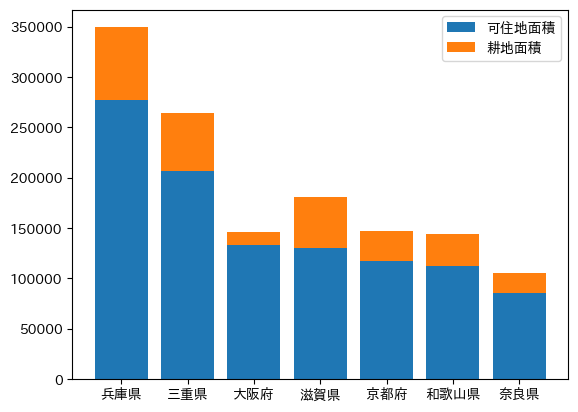

In [209]:
#15

plt.bar(x=kinki_area.index, height = kinki_area['可住地面積'], label='可住地面積')
plt.bar(x=kinki_area.index, height = kinki_area['耕地面積'], bottom=kinki_area['可住地面積'], label = '耕地面積')
plt.legend()
plt.show()

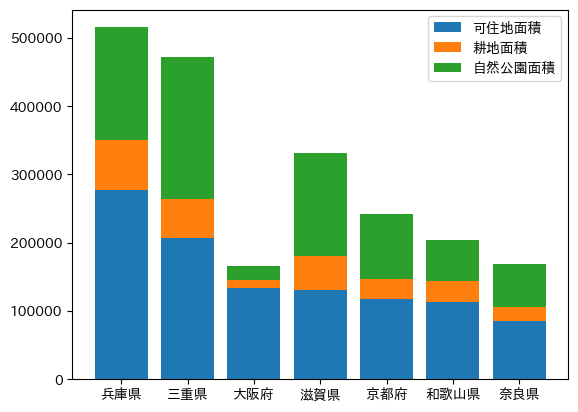

In [210]:
#16
plt.bar(x=kinki_area.index, height = kinki_area['可住地面積'], label='可住地面積')
plt.bar(x=kinki_area.index, height = kinki_area['耕地面積'], bottom=kinki_area['可住地面積'], label = '耕地面積')
plt.bar(x=kinki_area.index, height = kinki_area['自然公園面積'], bottom=kinki_area['可住地面積'] + kinki_area['耕地面積'], label = '自然公園面積')
plt.legend()
plt.show()